<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_CNN_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

In [1]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-13 05:55:39--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd1ba875979cdc88dde8ddaab5.dl.dropboxusercontent.com/cd/0/inline/CpnYTdIvzseQRl1O57V6lUTv3QMr9sKJ-RhfQ9u87Yrh4xM0p1d6reEx5JQQrECj8kot3NmejfZ7kWlZdHNMSFzqpmvzvCROBeM30PeUS3GqI9Sv4iY-400GC8Nkrf2rA1eDLvmjO-p5id1n3JjBvL0l/file# [following]
--2025-05-13 05:55:39--  https://ucfd1ba875979cdc88dde8ddaab5.dl.dropboxusercontent.com/cd/0/inline/CpnYTdIvzseQRl1O57V6lUTv3QMr9sKJ-RhfQ9u87Yrh4xM0p1d6reEx5JQQrECj8kot3NmejfZ7kWlZdHNMSFzqpmvzvCROBeM30PeUS3GqI9Sv4iY-400GC8Nkrf2rA1eDLvmjO-p5id1n3JjBvL0l/file
Resolving ucfd1ba875979cdc88dde8ddaab5.dl.dropboxusercontent.com (ucfd1ba875979cdc88dde8ddaab5.dl.dropboxusercontent.com)... 162.125.

Los datos de entrenamiento estan en un archivo que está alojado en dropbox, un servicio de almacenamiento en la nube. Los descargamos para poder utilizarlo como datos de entrenamiento.

In [2]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-13 05:56:03--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3ce4ead5404b27106f1475c5c.dl.dropboxusercontent.com/cd/0/inline/CplwGM6vqrJoMF1fuUvQIIRR_nqrv5N7vYvkJ4rxyRtz1MZ9SR43MBcuOHqyWVQ4VBv55_6m8puXYTKIt6kkqILu43MZbD-3ziZ8-nPQ1EBL7erDr3CK2ZzRBCLONIr4d7inXI5a-Ep7Ot4wqdOjOPtQ/file# [following]
--2025-05-13 05:56:03--  https://ucd3ce4ead5404b27106f1475c5c.dl.dropboxusercontent.com/cd/0/inline/CplwGM6vqrJoMF1fuUvQIIRR_nqrv5N7vYvkJ4rxyRtz1MZ9SR43MBcuOHqyWVQ4VBv55_6m8puXYTKIt6kkqILu43MZbD-3ziZ8-nPQ1EBL7erDr3CK2ZzRBCLONIr4d7inXI5a-Ep7Ot4wqdOjOPtQ/file
Resolving ucd3ce4ead5404b27106f1475c5c.dl.dropboxusercontent.com (ucd3ce4ead5404b27106f1475c5c.dl.dropboxusercontent.com)... 162.125.8

Los datos de prueba tambien estan en dropbox y los descargamos para poder utilixarlos como datos de prueba

In [3]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

los datos de entrenamientos se descomprimen con el !tar

Que significa -xzvf:

-x: extraer archivos.

-z: el archivo está comprimido con gzip (.gz).

-v: modo verbose, muestra los nombres de los archivos que se van extrayendo.

-f simpsons_train.tar.gz: el archivo sobre el que trabajas.

In [4]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

los datos de prueba se descomprimen con el !tar

-x: extraer archivos.

-z: el archivo está comprimido con gzip (.gz).

-v: modo verbose, muestra los nombres de los archivos que se van extrayendo.

-f simpsons_train.tar.gz: el archivo sobre el que trabajas.

In [5]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
import random

from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

In [6]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

Este código define dos funciones, load_train_set y load_test_set, cuyo propósito es cargar imágenes desde un directorio (de entrenamiento o prueba), redimensionarlas a un tamaño uniforme (IMG_SIZE x IMG_SIZE) utilizando OpenCV, y convertirlas en arrays NumPy listos para ser usados en modelos de deep learning. La función load_train_set recorre las carpetas de cada personaje (clase), redimensiona sus imágenes .jpg y asocia cada una a su respectiva etiqueta numérica (label) según un diccionario map_characters. Por otro lado, load_test_set toma imágenes sueltas desde una carpeta de test, deduce a qué personaje pertenecen a partir del nombre del archivo, y les asigna la etiqueta correspondiente usando un diccionario invertido. Ambas funciones permiten visualizar detalles del proceso si el parámetro verbose está activado, y devuelven los arrays X (con imágenes) y Y (con etiquetas).

In [7]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

El diccionario MAP_CHARACTERS define el mapeo entre clases numéricas y nombres de personajes, permitiendo convertir las etiquetas en valores entendibles por los modelos. Por otro lado, la constante IMG_SIZE = 64 asegura que todas las imágenes sean redimensionadas a 64x64 píxeles.

In [8]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


*Agregar total imagen de cada conjunto


Se definen las rutas donde están almacenadas las imágenes: DATASET_TRAIN_PATH_COLAB para el set de entrenamiento (simpsons) y DATASET_TEST_PATH_COLAB para el de prueba (simpsons_testset). Luego, se llaman las funciones load_train_set y load_test_set con estas rutas y el diccionario MAP_CHARACTERS como parámetros. El resultado son cuatro arrays: X y y contienen las imágenes de entrenamiento y sus respectivas etiquetas, mientras que X_test y y_test contienen los datos de prueba. Estos arrays ya están preprocesados (redimensionados a 64x64 píxeles) y listos para ser usados en el entrenamiento y evaluación de un modelo de clasificación de imágenes.

##¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?

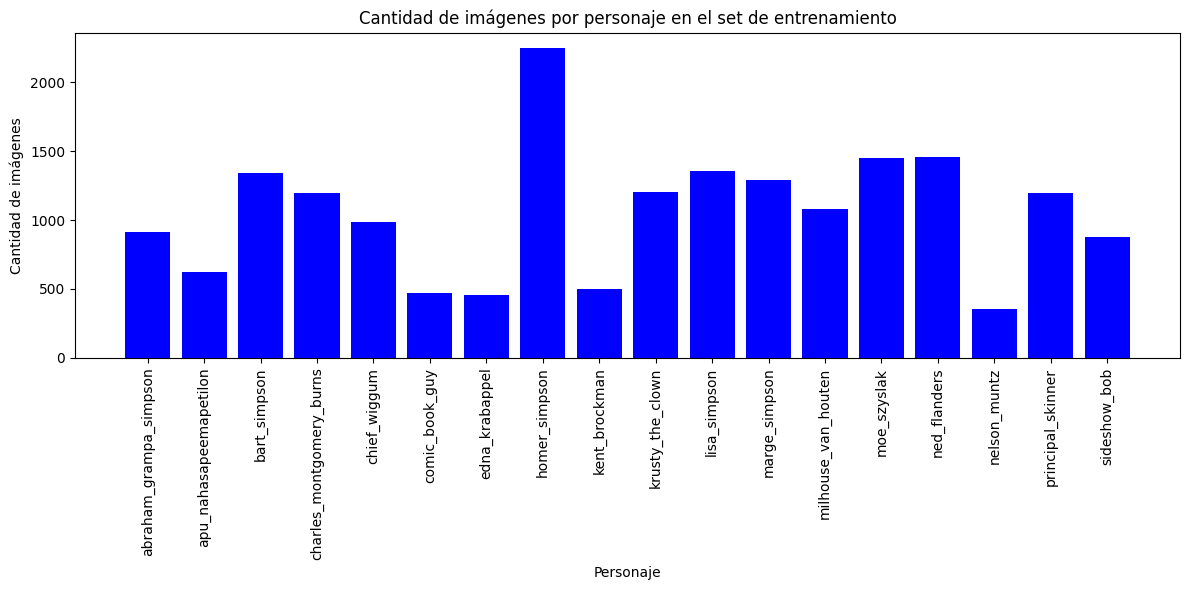

In [9]:
cantidad_por_personaje = collections.Counter(y)
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje.keys()]
cantidad = list(cantidad_por_personaje.values())

plt.figure(figsize=(12, 6))
plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Existe una mal distribucion de imagenes ya que hay algunas clases como la de homer_simpson las cuales se tiene mas de 2000 ejemplares y por otro lado clases como nelson_muntz las cuales no llegan ni a 500 imagenes, para mejorar la distribucion se se utilizara la tecnica de data augmentation la cual se basa en generar variadas imágenes a partir de una, estas nuevas imágenes consisten en variantes (rotada, volteada, escalada, entre otras opciones) lo que ayuda a entrenar modelos más robustos evitando, de esa forma, el overfitting.

*Agregar arriba: Una de las imagenes que mas problemas nos deberia dar son las que estan con menos de 500 ejemplares/imagenes ya que al contar con pocas el modelo tenderia a no identificarlas bien y dar otro resultado. Para resolver eso ocuparemos la tecnica de data augmentation (aqui unir)

Al aplicar la tecnica de data augmentation, busca cual clase es la con mas imagenes, en este caso la clase 7 correspondiente a homer_simpson con un total de 2246, entonces las demas clases generara imagenes hasta llegar a 2246. Ahora contamos con un total de 40428 imagenes de entrenamiento

In [10]:
# Copia de los datos originales
X_original = X.copy()
y_original = y.copy()

In [11]:
# Crear el generador de aumento
datagen = ImageDataGenerator(
    rotation_range=15,         # Rango moderado, más seguro para rostros y figuras
    width_shift_range=0.1,     # Pequeños desplazamientos horizontales
    height_shift_range=0.1,    # Pequeños desplazamientos verticales
    shear_range=0.05,          # Inclinaciones leves para no distorsionar caras
    zoom_range=0.1,            # Zoom leve para variar escala
    horizontal_flip=True,      # Muy útil si el personaje se ve igual al voltearse
    fill_mode='nearest'        # Mantiene continuidad visual al rellenar bordes
)

# Contar imágenes por clase
class_counts = Counter(y)
max_count = max(class_counts.values())
print("Distribución original:", class_counts)

X_augmented = []
y_augmented = []

for class_label, count in class_counts.items():
    if count < max_count:
        n_to_generate = max_count - count
        print(f"Aumentando clase {class_label} ({MAP_CHARACTERS[class_label]}): generando {n_to_generate} imágenes...")

        # Obtener solo las imágenes de esta clase
        class_indices = np.where(y == class_label)[0]
        class_images = X[class_indices]

        # Elegir imágenes aleatorias para aumentar
        for _ in range(n_to_generate):
            img = random.choice(class_images)
            img = np.expand_dims(img, axis=0)
            augmented_img = next(datagen.flow(img, batch_size=1))[0].astype('uint8')
            X_augmented.append(augmented_img)
            y_augmented.append(class_label)

# Combinar datos originales + aumentados
X = np.concatenate([X, np.array(X_augmented)], axis=0)
y = np.concatenate([y, np.array(y_augmented)], axis=0)

# Verificar nueva distribución
print("Nueva distribución balanceada:", Counter(y))

Distribución original: Counter({np.int64(7): 2246, np.int64(14): 1454, np.int64(13): 1452, np.int64(10): 1354, np.int64(2): 1342, np.int64(11): 1291, np.int64(9): 1206, np.int64(16): 1194, np.int64(3): 1193, np.int64(12): 1079, np.int64(4): 986, np.int64(0): 913, np.int64(17): 877, np.int64(1): 623, np.int64(8): 498, np.int64(5): 469, np.int64(6): 457, np.int64(15): 358})
Aumentando clase 0 (abraham_grampa_simpson): generando 1333 imágenes...
Aumentando clase 1 (apu_nahasapeemapetilon): generando 1623 imágenes...
Aumentando clase 2 (bart_simpson): generando 904 imágenes...
Aumentando clase 3 (charles_montgomery_burns): generando 1053 imágenes...
Aumentando clase 4 (chief_wiggum): generando 1260 imágenes...
Aumentando clase 5 (comic_book_guy): generando 1777 imágenes...
Aumentando clase 6 (edna_krabappel): generando 1789 imágenes...
Aumentando clase 8 (kent_brockman): generando 1748 imágenes...
Aumentando clase 9 (krusty_the_clown): generando 1040 imágenes...
Aumentando clase 10 (lisa_s

In [12]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.

#datos sin data augmentation
perm_orig = np.random.permutation(len(X_original))
X_noaug = X_original[perm_orig]
y_noaug = y_original[perm_orig]

In [13]:
#Datos con data augmentation
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

*Agregar que hace el codigo de arriba

In [14]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20% con datos sin data augmentation

X_train_noaug, X_val_noaug, y_train_noaug, y_val_noaug = train_test_split(X_noaug, y_noaug, test_size=0.2, random_state=29)


In [15]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  40428
Número de imágenes de training (80% de anterior train) :  32342
Número de imágenes de validación (20% de anterior train) :  8086
Número de imágenes de test :  890
Número de resultados de anterior training :  40428
Número de resultados de training (80% de anterior train) :  32342
Número de resultadoss de validación (20% de anterior train) :  8086
Número de resultados de test :  890
Dimensiones de training :  (32342, 64, 64, 3)
Dimensiones de validation :  (8086, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


*COPIADO y pegado del chat

Este bloque de código realiza varios pasos clave para preparar y verificar la estructura de los datos de entrenamiento, validación y prueba. A continuación te explico cada sección:

Separación de Datos:
Utiliza la función train_test_split para dividir el conjunto de entrenamiento (X, y) en dos partes:

Entrenamiento (80%): X_train, y_train.

Validación (20%): X_val, y_val.

Esto es útil para entrenar el modelo con un conjunto grande de datos y validarlo con un conjunto diferente para evitar sobreajuste.

Variables de Dimensiones y Categorías:
X_train_num_elem, X_val_num_elem, X_test_num_elem: Calcula el número de elementos en cada conjunto.

img_rows, img_cols: El tamaño de las imágenes (64x64 en este caso).

img_channels: El número de canales de color (usualmente 3 para imágenes RGB).

num_categ: El número de categorías o clases (18 en este caso, según MAP_CHARACTERS).

Impresión de Verificación:
Luego, el bloque imprime varias líneas para verificar que la separación y la estructura de las dimensiones es la correcta:

Número de imágenes en cada conjunto (entrenamiento, validación, prueba).

Dimensiones de cada conjunto (X_train, X_val, X_test), asegurando que las imágenes están correctamente formateadas.

Verifica la resolución de las imágenes y los canales de color.

In [17]:
#normalizar sin data augmentation
X_train_noaug = X_train_noaug / 255
X_val_noaug = X_val_noaug / 255
X_test_norm = X_test / 255
print(X_train_noaug.shape, X_val_noaug.shape, X_test_norm.shape)


#aplicar el one-hot sin data augmentation
y_train_noaug = keras.utils.to_categorical(y_train_noaug, 18)
y_val_noaug = keras.utils.to_categorical(y_val_noaug, 18)
y_test_oh = keras.utils.to_categorical(y_test, 18)
print(y_train_noaug.shape, y_val_noaug.shape, y_test_oh.shape)

(15193, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(15193, 18, 18) (3799, 18, 18) (890, 18)


In [78]:
#normalizar con data augmentation
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
print(X_train.shape, X_val.shape, X_test.shape)

#aplicar el one-hot con data augmentation
y_train = keras.utils.to_categorical(y_train, 18)
y_val = keras.utils.to_categorical(y_val, 18)
y_test = keras.utils.to_categorical(y_test, 18)

print(y_train.shape, y_val.shape, y_test.shape)

(32342, 64, 64, 3) (8086, 64, 64, 3) (890, 64, 64, 3)
(32342, 18) (8086, 18) (890, 18)


*agregar que dice el codigo anterior

# Definición de modelos

Incluir acá los modelos con los cuales se va a trabajar

Comparación de modelos CNNs con un modelo de Fully Connected para este problema.

*Si estoy en lo correcto primero deveriamos empezar con una red sin conv2D ni maxpool solo con flatten, dropout y capas ocultas ya que esas son modelos mlp y cnn seria cuando metimos la weas 2d

Los modelos seran entrenados con el optimizador "adam" por que: #AGREAGAER#

Los modelos seran entrenados con la funcion de activacion "Relu" por que: #AGREGAR

Los modelos seran entrenados con la funcion de activacion de la capa de salida "softmax" por que: #AGREGAR

Los modelos seran entrenados con la funcion de perdida "categorical_crossentropy" por que: #AGREGAR

## Modelo 1

2 con, 2 polling, flatten, dropout, 5 capas y sin data augumentation

In [79]:
red_sin_augmentation = keras.Sequential(name="CNN_Sin_Augmentation")
red_sin_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation.add(Flatten(name="flatten_1"))

red_sin_augmentation.add(Dropout(0.3, name="dropout_1"))
red_sin_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_2"))
red_sin_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_sin_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_4"))
red_sin_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_sin_augmentation.add(Dropout(0.35, name="dropout_5"))
red_sin_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_sin_augmentation.summary()

Model: "CNN_Sin_Augmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,390,226 (16.75 MB)

 Trainable params: 4,390,226 (16.75 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
red_sin_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug = red_sin_augmentation.fit(
    X_train_noaug, y_train_noaug,
    validation_data=(X_val_noaug, y_val_noaug),
    batch_size=32,
    epochs=10
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1138 - loss: 2.8030 - precision: 0.3591 - recall: 0.0057 - val_accuracy: 0.2114 - val_loss: 2.5161 - val_precision: 0.7213 - val_recall: 0.0695
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2379 - loss: 2.4395 - precision: 0.7113 - recall: 0.0653 - val_accuracy: 0.3306 - val_loss: 2.0741 - val_precision: 0.7896 - val_recall: 0.1392
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3538 - loss: 2.0789 - precision: 0.7573 - recall: 0.1536 - val_accuracy: 0.4396 - val_loss: 1.8225 - val_precision: 0.8538 - val_recall: 0.2090
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4295 - loss: 1.8106 - precision: 0.7849 - recall: 0.2371 - val_accuracy: 0.4893 - val_loss: 1.6161 - val_precision: 0.8352 - val_recall: 0.2961
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4913 - loss: 1.6124 - precision: 0.8036 - recall: 0.2968 - val_accuracy: 0.5025 - val_loss: 

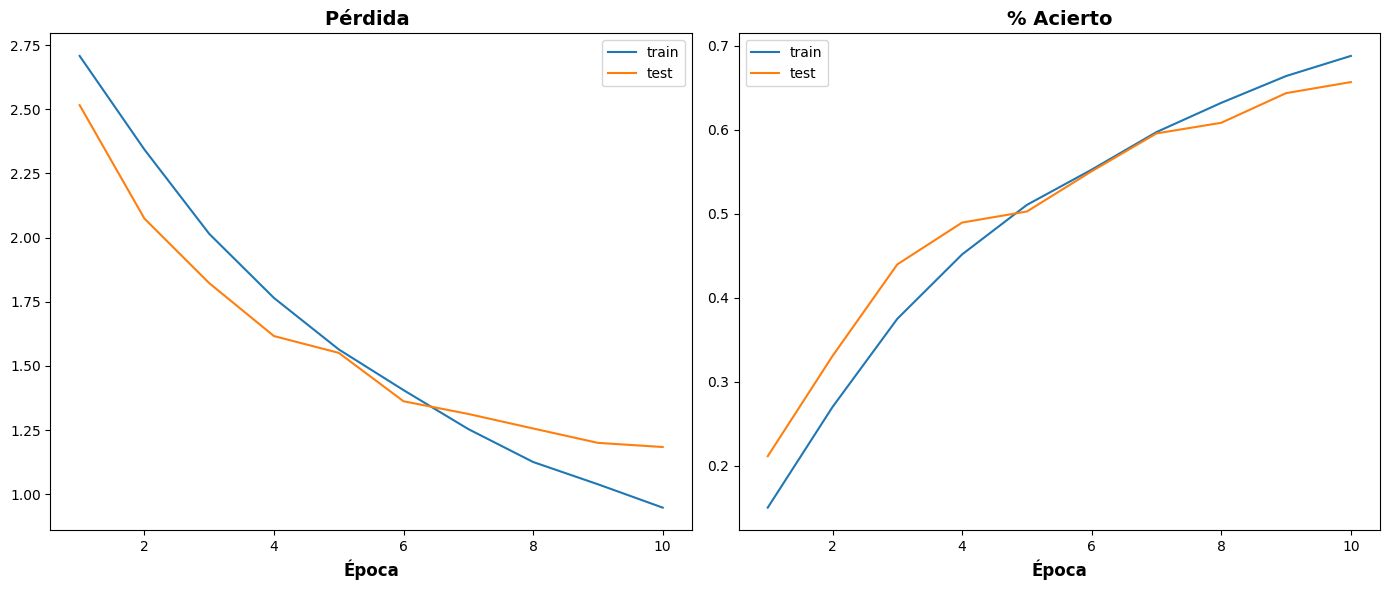

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist_sin_aug.history['loss']) + 1)

axs[0].plot(epoca1, hist_sin_aug.history['loss'], label="train")
axs[0].plot(epoca1, hist_sin_aug.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist_sin_aug.history['accuracy'], label="train")
axs[1].plot(epoca1, hist_sin_aug.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [82]:
u = {
    'Métrica': list(hist_sin_aug.history.keys()),
    'PrimeraRed': [hist_sin_aug.history[k][-1] for k in hist_sin_aug.history],
}

i = pd.DataFrame(u)

display(i)

,Métrica,PrimeraRed
0,accuracy,0.687619
1,loss,0.947524
2,precision,0.840914
3,recall,0.559797
4,val_accuracy,0.656489
5,val_loss,1.183801
6,val_precision,0.830189
7,val_recall,0.555936


Debemos borrar los datos generados sin data aug, como no los usaremos más, colab se queda sin memoria y debemos aumentarla para seguir con los modelos con data aug.

In [83]:
del X_train_noaug
del y_train_noaug
del X_val_noaug
del y_val_noaug
import gc
gc.collect()


167084

## Modelo 2

2 con, 2 polling, flatten, dropout, 5 capas y con data augmentation

In [22]:
PrimeraRed = keras.Sequential(name="CNN_1")
PrimeraRed.add(Input(shape=(64, 64, 3), name="entrada"))

PrimeraRed.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_1"))
PrimeraRed.add(MaxPooling2D((2, 2), name="pooling_1"))

PrimeraRed.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_2"))
PrimeraRed.add(MaxPooling2D((2, 2), name="pooling_2"))

PrimeraRed.add(Flatten(name="flatten_1"))

PrimeraRed.add(Dropout(0.3, name="dropout_1"))
PrimeraRed.add(Dense(512, activation='relu', name="CapaOculta_1"))

PrimeraRed.add(Dropout(0.3, name="dropout_2"))
PrimeraRed.add(Dense(256, activation='relu', name="CapaOculta_2"))

PrimeraRed.add(Dense(128, activation='relu', name="CapaOculta_3"))

PrimeraRed.add(Dropout(0.3, name="dropout_3"))
PrimeraRed.add(Dense(64, activation='relu', name="CapaOculta_4"))

PrimeraRed.add(Dropout(0.3, name="dropout_4"))
PrimeraRed.add(Dense(32, activation='relu', name="CapaOculta_5"))

PrimeraRed.add(Dropout(0.35, name="dropout_5"))

PrimeraRed.add(Dense(18, activation='softmax', name="salida"))

PrimeraRed.summary()

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,390,226 (16.75 MB)

 Trainable params: 4,390,226 (16.75 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
np.random.seed(29)
tf.random.set_seed(29)

PrimeraRed.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist = PrimeraRed.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.1020 - loss: 2.7839 - precision: 0.6131 - recall: 0.0182 - val_accuracy: 0.2517 - val_loss: 2.3359 - val_precision: 0.6855 - val_recall: 0.0704
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2233 - loss: 2.3829 - precision: 0.6739 - recall: 0.0657 - val_accuracy: 0.3185 - val_loss: 2.1231 - val_precision: 0.8248 - val_recall: 0.1299
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3272 - loss: 2.1134 - precision: 0.7943 - recall: 0.1461 - val_accuracy: 0.4638 - val_loss: 1.6973 - val_precision: 0.8591 - val_recall: 0.2715
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4377 - loss: 1.8115 - precision: 0.8374 - recall: 0.2491 - val_accuracy: 0.5186 - val_loss: 1.5197 - val_precision: 0.8613 - val_recall: 0.3449
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4997 - loss: 1.5947 - precision: 0.8547 - recall: 0.3198 - val_accuracy: 0.5641 

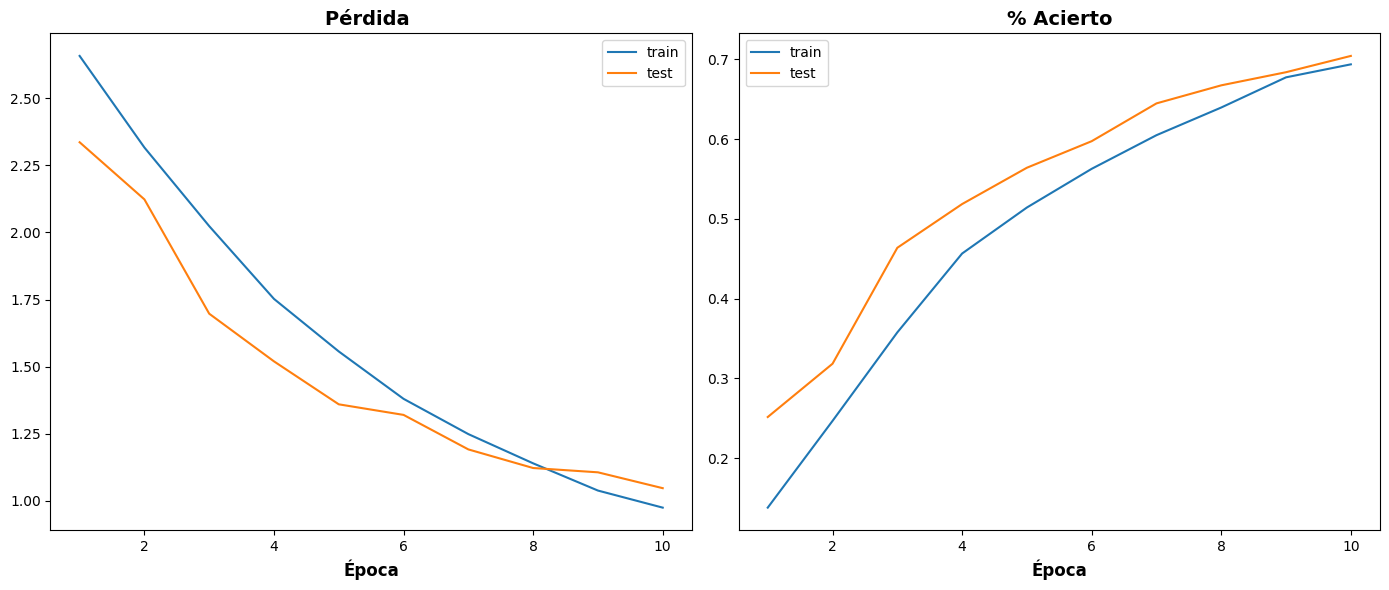

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist.history['loss']) + 1)

axs[0].plot(epoca1, hist.history['loss'], label="train")
axs[0].plot(epoca1, hist.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist.history['accuracy'], label="train")
axs[1].plot(epoca1, hist.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [25]:
a = {
    'Métrica': list(hist.history.keys()),
    'PrimeraRed': [hist.history[k][-1] for k in hist.history],
}

b = pd.DataFrame(a)

display(b)

,Métrica,PrimeraRed
0,accuracy,0.693618
1,loss,0.974898
2,precision,0.890031
3,recall,0.559798
4,val_accuracy,0.704180
5,val_loss,1.047380
6,val_precision,0.888473
7,val_recall,0.587188


*pequeñas conclu

## Modelo 3

Modelo CNN 1

Cambio: Menos capas ocultas y dropout, y agregacion de 3 conv y pool

In [26]:
PrimeraRedMejorada = keras.Sequential(name="CNN_Mejorada")
PrimeraRedMejorada.add(Input(shape=(64, 64, 3), name="entrada"))

PrimeraRedMejorada.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
PrimeraRedMejorada.add(MaxPooling2D((2, 2), name="pooling_1"))

PrimeraRedMejorada.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
PrimeraRedMejorada.add(MaxPooling2D((2, 2), name="pooling_2"))

PrimeraRedMejorada.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
PrimeraRedMejorada.add(MaxPooling2D((2, 2), name="pooling_3"))

PrimeraRedMejorada.add(Flatten(name="flatten_1"))

PrimeraRedMejorada.add(Dropout(0.4, name="dropout_1"))
PrimeraRedMejorada.add(Dense(256, activation='relu', name="CapaOculta_1"))
PrimeraRedMejorada.add(Dropout(0.4, name="dropout_2"))
PrimeraRedMejorada.add(Dense(128, activation='relu', name="CapaOculta_2"))
PrimeraRedMejorada.add(Dropout(0.3, name="dropout_3"))
PrimeraRedMejorada.add(Dense(18, activation='softmax', name="salida"))

PrimeraRedMejorada.summary()

Model: "CNN_Mejorada"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
np.random.seed(29)
tf.random.set_seed(29)

PrimeraRedMejorada.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist2 = PrimeraRedMejorada.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.2408 - loss: 2.4080 - precision: 0.6156 - recall: 0.0845 - val_accuracy: 0.6620 - val_loss: 1.1149 - val_precision: 0.8764 - val_recall: 0.5032
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6270 - loss: 1.2280 - precision: 0.8307 - recall: 0.4788 - val_accuracy: 0.7696 - val_loss: 0.7616 - val_precision: 0.8971 - val_recall: 0.6671
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7397 - loss: 0.8615 - precision: 0.8693 - recall: 0.6407 - val_accuracy: 0.8256 - val_loss: 0.5882 - val_precision: 0.9190 - val_recall: 0.7567
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7950 - loss: 0.6779 - precision: 0.8977 - recall: 0.7225 - val_accuracy: 0.8324 - val_loss: 0.5821 - val_precision: 0.9092 - val_recall: 0.7791
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8243 - loss: 0.5644 - precision: 0.9012 - recall: 0.7643 - val_accuracy: 0.8674 -

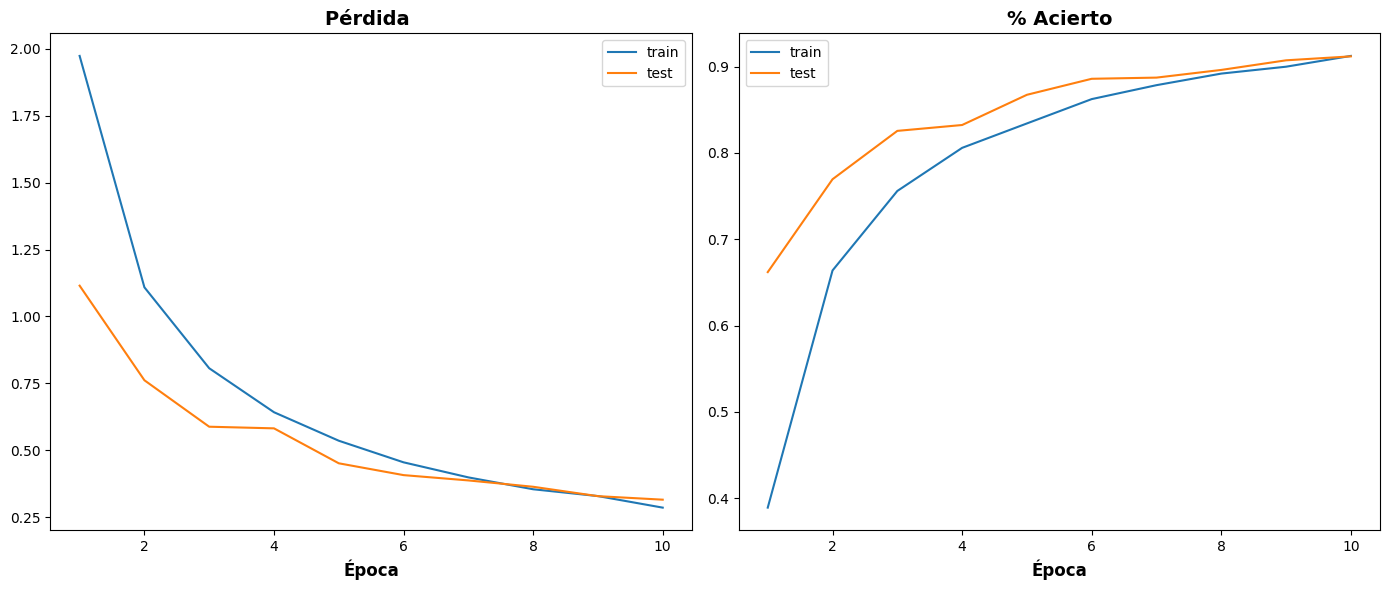

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist2.history['loss']) + 1)

axs[0].plot(epoca1, hist2.history['loss'], label="train")
axs[0].plot(epoca1, hist2.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist2.history['accuracy'], label="train")
axs[1].plot(epoca1, hist2.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [29]:
c = {
    'Métrica': list(hist2.history.keys()),
    'PrimeraRed': [hist2.history[k][-1] for k in hist.history],
}

d = pd.DataFrame(c)

display(d)

,Métrica,PrimeraRed
0,accuracy,0.912467
1,loss,0.285977
2,precision,0.943198
3,recall,0.886680
4,val_accuracy,0.911947
5,val_loss,0.315703
6,val_precision,0.946869
7,val_recall,0.888202


*pequeñas conclu

###Modelo 3 / prueba batch notmalizacion

Modelo CNN2

Se mantiene arquitectura anterior y se agrega Batch Normalization

In [30]:
SegundaRedMejorada = keras.Sequential(name="CNN_Mejorada2")
SegundaRedMejorada.add(Input(shape=(64, 64, 3), name="entrada"))

SegundaRedMejorada.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_1"))
SegundaRedMejorada.add(MaxPooling2D((2, 2), name="pooling_1"))

SegundaRedMejorada.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_2"))
SegundaRedMejorada.add(MaxPooling2D((2, 2), name="pooling_2"))

SegundaRedMejorada.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_3"))
SegundaRedMejorada.add(MaxPooling2D((2, 2), name="pooling_3"))

SegundaRedMejorada.add(Flatten(name="Flatten"))

SegundaRedMejorada.add(Dropout(0.4, name="dropout_1"))
SegundaRedMejorada.add(Dense(256, activation='relu', name="CapaOculta_1"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_4"))
SegundaRedMejorada.add(Dropout(0.4, name="dropout_2"))
SegundaRedMejorada.add(Dense(128, activation='relu', name="CapaOculta_2"))
SegundaRedMejorada.add(Dropout(0.3, name="dropout_3"))
SegundaRedMejorada.add(Dense(18, activation='softmax', name="salida"))

SegundaRedMejorada.summary()

Model: "CNN_Mejorada2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,227,794 (8.50 MB)

 Trainable params: 2,226,834 (8.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [31]:
np.random.seed(29)
tf.random.set_seed(29)

SegundaRedMejorada.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist3 = SegundaRedMejorada.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3534 - loss: 2.3065 - precision: 0.5743 - recall: 0.2081 - val_accuracy: 0.6916 - val_loss: 1.0544 - val_precision: 0.8886 - val_recall: 0.5339
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6726 - loss: 1.0961 - precision: 0.8293 - recall: 0.5618 - val_accuracy: 0.7790 - val_loss: 0.7478 - val_precision: 0.8998 - val_recall: 0.6929
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7799 - loss: 0.7187 - precision: 0.8769 - recall: 0.7100 - val_accuracy: 0.8087 - val_loss: 0.6402 - val_precision: 0.8779 - val_recall: 0.7648
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8394 - loss: 0.5295 - precision: 0.8996 - recall: 0.7924 - val_accuracy: 0.8265 - val_loss: 0.5885 - val_precision: 0.8902 - val_recall: 0.7827
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8731 - loss: 0.4134 - precision: 0.9211 - recall: 0.8385 - val_accuracy: 0.8834 

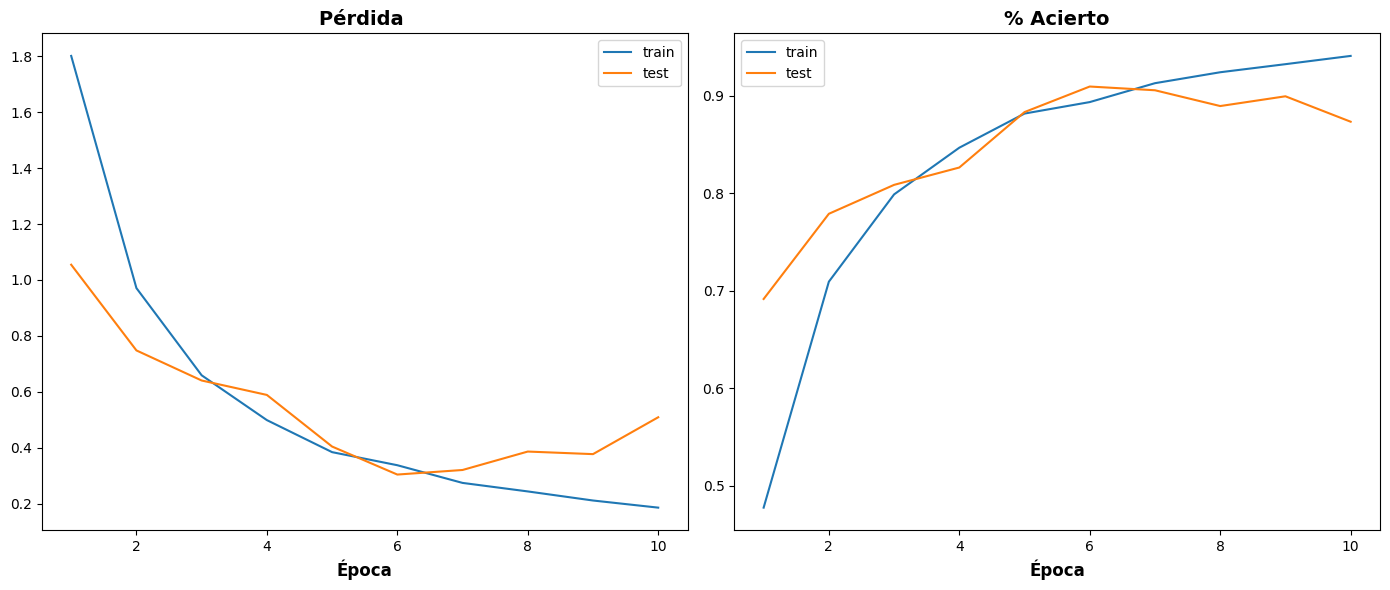

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist2.history['loss']) + 1)

axs[0].plot(epoca1, hist3.history['loss'], label="train")
axs[0].plot(epoca1, hist3.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist3.history['accuracy'], label="train")
axs[1].plot(epoca1, hist3.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [33]:
e = {
    'Métrica': list(hist3.history.keys()),
    'PrimeraRed': [hist3.history[k][-1] for k in hist.history],
}

f = pd.DataFrame(e)

display(f)

,Métrica,PrimeraRed
0,accuracy,0.941006
1,loss,0.185351
2,precision,0.954867
3,recall,0.929565
4,val_accuracy,0.873485
5,val_loss,0.508651
6,val_precision,0.898947
7,val_recall,0.854811


*pequeñas conclu

###Modelo 4 / prueba batch notmalizacion agregar otra capa conv y otra de pooling


In [34]:
red_4_capas = keras.Sequential(name="CNN_4_capas")
red_4_capas.add(Input(shape=(64, 64, 3), name="entrada"))

red_4_capas.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_4_capas.add(BatchNormalization(name="batchNormalization_1"))
red_4_capas.add(MaxPooling2D((2, 2), name="pooling_1"))

red_4_capas.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_4_capas.add(BatchNormalization(name="batchNormalization_2"))
red_4_capas.add(MaxPooling2D((2, 2), name="pooling_2"))

red_4_capas.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_4_capas.add(BatchNormalization(name="batchNormalization_3"))
red_4_capas.add(MaxPooling2D((2, 2), name="pooling_3"))

red_4_capas.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_4"))
red_4_capas.add(BatchNormalization(name="batchNormalization_4"))
red_4_capas.add(MaxPooling2D((2, 2), name="pooling_4"))

red_4_capas.add(Flatten(name="Flatten"))

red_4_capas.add(Dropout(0.4, name="dropout_1"))
red_4_capas.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_4_capas.add(BatchNormalization(name="batchNormalization_5"))
red_4_capas.add(Dropout(0.4, name="dropout_2"))
red_4_capas.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_4_capas.add(Dropout(0.3, name="dropout_3"))
red_4_capas.add(Dense(18, activation='softmax', name="salida"))

red_4_capas.summary()

Model: "CNN_4_capas"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_4 (Conv2D)          │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_4 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,026 (3.06 MB)

 Trainable params: 801,810 (3.06 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [35]:
np.random.seed(29)
tf.random.set_seed(29)

red_4_capas.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_red_4_capas = red_4_capas.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.3185 - loss: 2.4076 - precision: 0.5351 - recall: 0.1763 - val_accuracy: 0.6796 - val_loss: 1.0732 - val_precision: 0.8553 - val_recall: 0.5469
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6899 - loss: 1.0249 - precision: 0.8310 - recall: 0.5883 - val_accuracy: 0.8171 - val_loss: 0.6195 - val_precision: 0.9067 - val_recall: 0.7536
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8045 - loss: 0.6653 - precision: 0.8876 - recall: 0.7439 - val_accuracy: 0.8206 - val_loss: 0.6066 - val_precision: 0.8853 - val_recall: 0.7726
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8527 - loss: 0.4946 - precision: 0.9110 - recall: 0.8151 - val_accuracy: 0.8658 - val_loss: 0.4421 - val_precision: 0.9211 - val_recall: 0.8326
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8796 - loss: 0.3960 - precision: 0.9264 - recall: 0.8488 - val_accuracy: 0.8753 

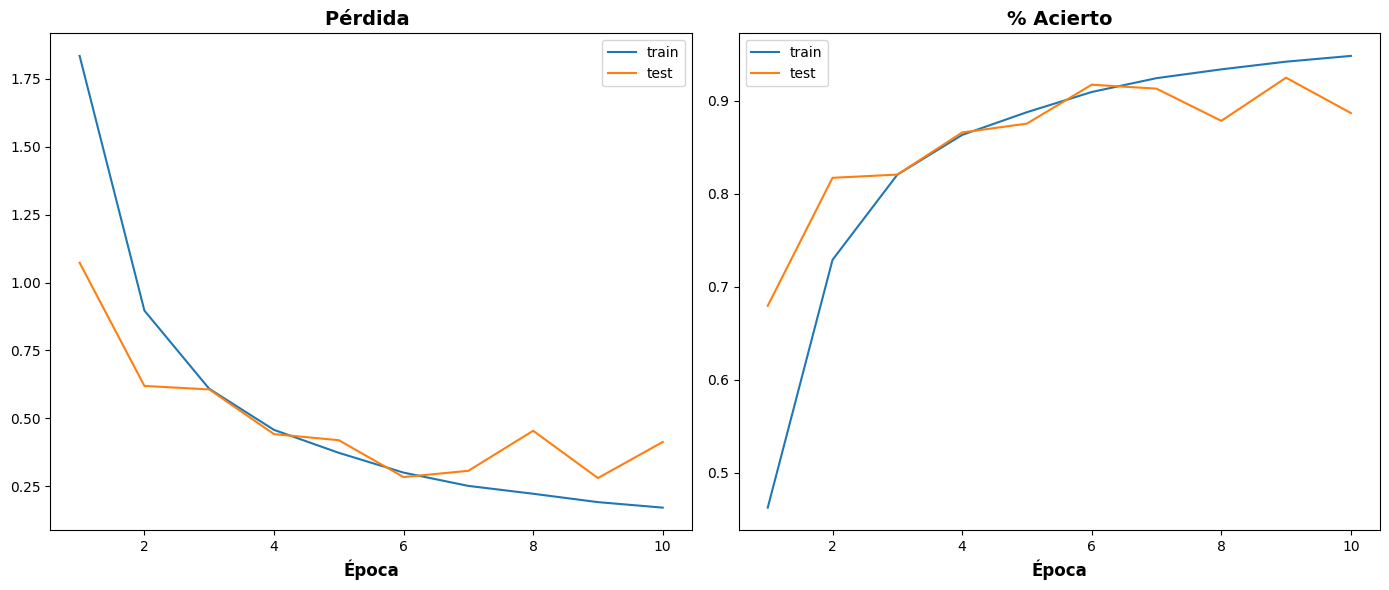

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist_red_4_capas.history['loss']) + 1)

axs[0].plot(epoca1, hist_red_4_capas.history['loss'], label="train")
axs[0].plot(epoca1, hist_red_4_capas.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist_red_4_capas.history['accuracy'], label="train")
axs[1].plot(epoca1, hist_red_4_capas.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

##Comparacion modelos

In [37]:
modelo1 = {
    'Nombre': 'PrimeraRed',
    'Capas Convolucionales': 'No',
    'Capas MaxPooling': 'No',
    'Barch Normalization': 'No',
    'Capas Ocultas': '5 (512, 256, 128, 64 y 32)',
    'Dropout': '5 (4 de 0.3 y 1 de 0.35)',
    'Train Accuracy': hist.history['accuracy'][-1],
    'Validation Accuracy': hist.history['val_accuracy'][-1],
    'Train Loss': hist.history['loss'][-1],
    'Validation Loss': hist.history['val_loss'][-1]}

modelo2 = {
    'Nombre': 'PrimeraRedMejorada',
    'Capas Convolucionales': '3 (32, 64 y 128, 3x3)',
    'Capas MaxPooling': '3 (2x2)',
    'Barch Normalization': 'No',
    'Capas Ocultas': '2 (256, 128)',
    'Dropout': '3 (2 de 0.4 y 1 de 0.3)',
    'Train Accuracy': hist2.history['accuracy'][-1],
    'Validation Accuracy': hist2.history['val_accuracy'][-1],
    'Train Loss': hist2.history['loss'][-1],
    'Validation Loss': hist2.history['val_loss'][-1]}

modelo3 = {
    'Nombre': 'SegundaRedMejorada',
    'Capas Convolucionales': '3 (32, 64 y 128, 3x3)',
    'Capas MaxPooling': '3 (2x2)',
    'Barch Normalization': '4',
    'Capas Ocultas': '2 (256, 128)',
    'Dropout': '3 (2 de 0.4 y 1 de 0.3)',
    'Train Accuracy': hist3.history['accuracy'][-1],
    'Validation Accuracy': hist3.history['val_accuracy'][-1],
    'Train Loss': hist3.history['loss'][-1],
    'Validation Loss': hist3.history['val_loss'][-1]}

modelos = pd.DataFrame([modelo1, modelo2, modelo3])

modelos

,Nombre,Capas Convolucionales,Capas MaxPooling,Barch Normalization,Capas Ocultas,Dropout,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,PrimeraRed,No,No,No,"5 (512, 256, 128, 64 y 32)",5 (4 de 0.3 y 1 de 0.35),0.693618,0.704180,0.974898,1.047380
1,PrimeraRedMejorada,"3 (32, 64 y 128, 3x3)",3 (2x2),No,"2 (256, 128)",3 (2 de 0.4 y 1 de 0.3),0.912467,0.911947,0.285977,0.315703
2,SegundaRedMejorada,"3 (32, 64 y 128, 3x3)",3 (2x2),4,"2 (256, 128)",3 (2 de 0.4 y 1 de 0.3),0.941006,0.873485,0.185351,0.508651


In [86]:
def metricass(history):
    return {
        'Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Validation Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Train Loss': f"{history.history['loss'][-1]:.4f}",
        'Validation Loss': f"{history.history['val_loss'][-1]:.4f}"
    }

modelos_data = [ #LE AGREGAMOS padding? es que seria todo si asi que nose solo mencionar e la presentation presenteichon presentationeichon
    {
        'Nombre': 'Red Sin Augmentation','Capas Convolucionales': '2 (64, 32, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricass(hist_sin_aug)
    },
    {
        'Nombre': 'Primera Red','Capas Convolucionales': '2 (64, 32, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricass(hist)
    },
    {
        'Nombre': 'Primera Red Mejorada','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': 'No','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricass(hist2)
    },
    {
        'Nombre': 'Segunda Red Mejorada','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': '4 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricass(hist3)
    },
    {
        'Nombre': 'Red 4 Capas','Capas Convolucionales': '4 (32, 64, 128, 128, 3×3)','Capas MaxPooling': '4 (2×2)','Batch Normalization': '5 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricass(hist_red_4_capas)
    }
]

modelos = pd.DataFrame(modelos_data)

modelos

,Nombre,Capas Convolucionales,Capas MaxPooling,Batch Normalization,Capas Ocultas,Dropout,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Red Sin Augmentation,"2 (64, 32, 3×3)",2 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.6876,0.6565,0.9475,1.1838
1,Primera Red,"2 (64, 32, 3×3)",2 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.6936,0.7042,0.9749,1.0474
2,Primera Red Mejorada,"3 (32, 64, 128, 3×3)",3 (2×2),No,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9125,0.9119,0.2860,0.3157
3,Segunda Red Mejorada,"3 (32, 64, 128, 3×3)",3 (2×2),4 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9410,0.8735,0.1854,0.5087
4,Red 4 Capas,"4 (32, 64, 128, 128, 3×3)",4 (2×2),5 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9481,0.8867,0.1713,0.4130


*Intente hacer tu grafico bonito pero no me salio asi que se lo pedi a la IA

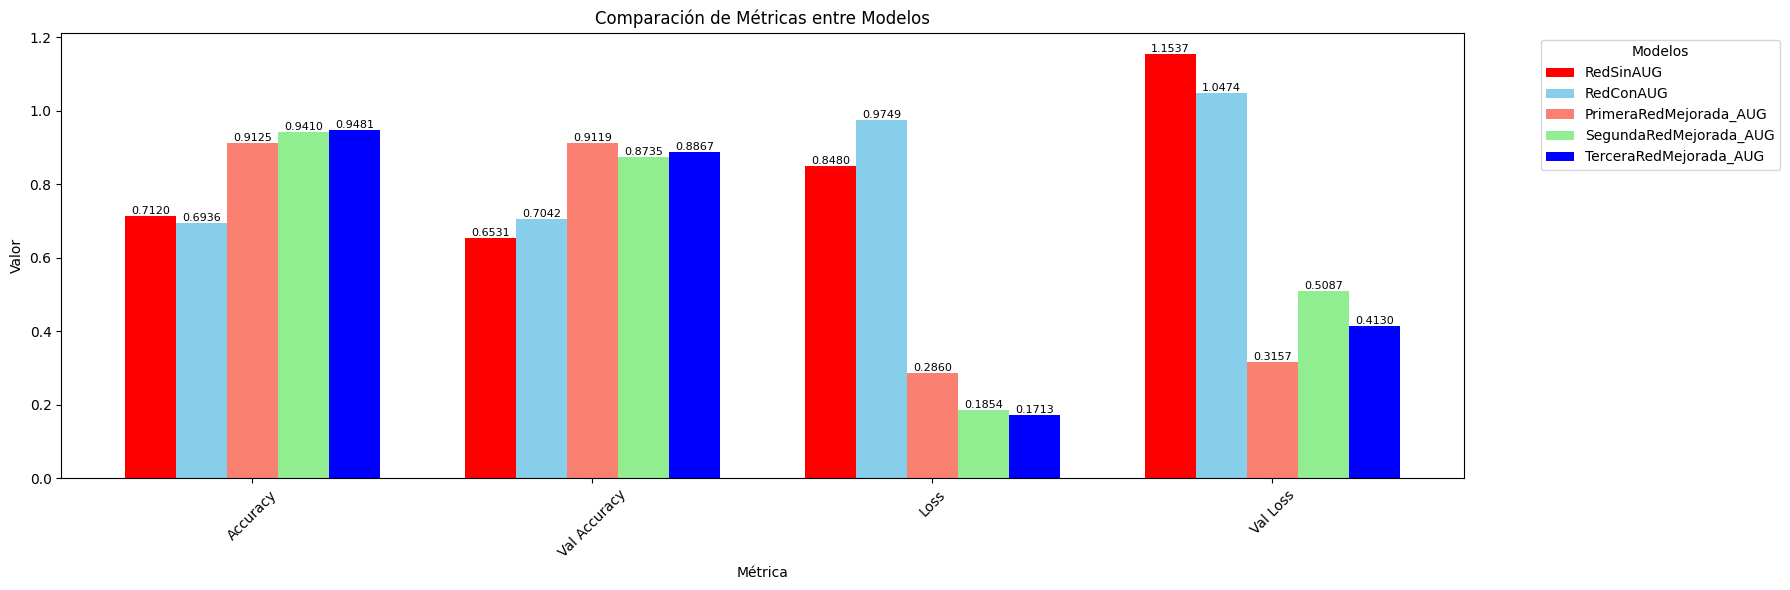

In [57]:
m0 = hist_sin_aug.history
m1 = hist.history
m2 = hist2.history
m3 = hist3.history
m4 = hist_red_4_capas.history

# Nombres de los modelos
n0 = 'RedSinAUG'
n1 = 'RedConAUG'
n2 = 'PrimeraRedMejorada_AUG'
n3 = 'SegundaRedMejorada_AUG'
n4 = 'TerceraRedMejorada_AUG'

# Crear DataFrame de comparación
comparacion_modelos = pd.DataFrame({
    'Métrica': ['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss'],
    n0: [m0['accuracy'][-1], m0['val_accuracy'][-1], m0['loss'][-1], m0['val_loss'][-1]],
    n1: [m1['accuracy'][-1], m1['val_accuracy'][-1], m1['loss'][-1], m1['val_loss'][-1]],
    n2: [m2['accuracy'][-1], m2['val_accuracy'][-1], m2['loss'][-1], m2['val_loss'][-1]],
    n3: [m3['accuracy'][-1], m3['val_accuracy'][-1], m3['loss'][-1], m3['val_loss'][-1]],
    n4: [m4['accuracy'][-1], m4['val_accuracy'][-1], m4['loss'][-1], m4['val_loss'][-1]],
})

# Configuración del gráfico
plt.figure(figsize=(18, 6))
bar_width = 0.15
index = range(len(comparacion_modelos))

# Dibujar las barras para cada modelo con posiciones adecuadas
bars0 = plt.bar([i - 2*bar_width for i in index], comparacion_modelos[n0], bar_width, label=n0, color='red')
bars1 = plt.bar([i - bar_width for i in index], comparacion_modelos[n1], bar_width, label=n1, color='skyblue')
bars2 = plt.bar(index, comparacion_modelos[n2], bar_width, label=n2, color='salmon')
bars3 = plt.bar([i + bar_width for i in index], comparacion_modelos[n3], bar_width, label=n3, color='lightgreen')
bars4 = plt.bar([i + 2*bar_width for i in index], comparacion_modelos[n4], bar_width, label=n4, color='blue')

# Añadir etiquetas encima de cada barra
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

add_labels(bars0)
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Etiquetas y título
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(index, comparacion_modelos['Métrica'], rotation=45)
plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Validación Accuracy (la más importante): Esto indica cómo de bien generaliza el modelo a datos nuevos.

Ganador en validación accuracy: SegundaRedMejorada, aunque PrimeraRedMejora esta muy cerca con una diferencia de 0.0010.

Validación Loss: Esto mide el error real, penaliza más si las predicciones están lejos.

Ganador en validación Loss: PrimeraRedMejorada, aunque SegundaRedMejorada tiene mejor accuracy, su loss es ligeramente más alto. Pero la diferencia es mínima de un 0.02.

Overfitting (Sobreentrenamiento): Si Train Accuracy está muy por encima de Validation Accuracy, hay overfitting, lo que buscamo minimizar lo mas posible

Diferencias entre accuracys

PrimeraRed	0.7496 y	0.7409	= 0.0087 (pequeño overfitting)

PrimeraRedMejorada	0.9066 y	0.9116	= -0.005 (el mejor generalizando)

SegundaRedMejorada	0.9408 y	0.9126	= 0.0282 (medio/alto overfitting)

Ganador en menos Overfitting: PrimeraRedMejorada.

Conclusión Final:

El mejor modelo en esta comparación es PrimeraRedMejorada, porque tiene una diferencia minima en la validacion accuracy y menor perdida, ademas de casi nadad de overfitting.

##Mejor modelo

In [58]:
PrimeraRedMejorada.save("PrimeraRedMejorada.keras")

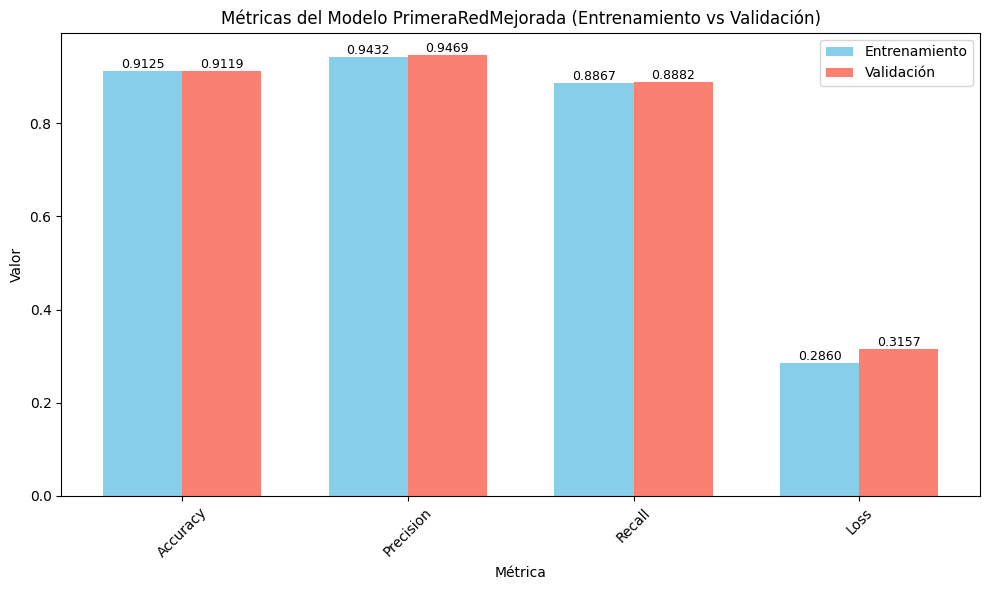

In [40]:
# Crear DataFrame con métricas incluyendo loss
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'Loss'],
    'Entrenamiento': [
        hist2.history['accuracy'][-1],
        hist2.history['precision'][-1],
        hist2.history['recall'][-1],
        hist2.history['loss'][-1]
    ],
    'Validación': [
        hist2.history['val_accuracy'][-1],
        hist2.history['val_precision'][-1],
        hist2.history['val_recall'][-1],
        hist2.history['val_loss'][-1]
    ]
})

# Configurar gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics_df))

# Dibujar las barras
bars1 = plt.bar(index, metrics_df['Entrenamiento'], bar_width, label='Entrenamiento', color='skyblue')
bars2 = plt.bar([i + bar_width for i in index], metrics_df['Validación'], bar_width, label='Validación', color='salmon')

# Etiquetas encima de las barras
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Etiquetas del eje x y configuración
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Métricas del Modelo PrimeraRedMejorada (Entrenamiento vs Validación)')
plt.xticks([i + bar_width / 2 for i in index], metrics_df['Métrica'], rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


*Concluciones

## Predicciones

In [41]:
from tensorflow.keras.models import load_model

cargarmodel = load_model('PrimeraRedMejorada.keras')

prediccion = cargarmodel.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9689 - loss: 0.1270 - precision: 0.9826 - recall: 0.9557


Lo de abajo es copiado del chat pq la wea se me veia un cuadro ql negro wn

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

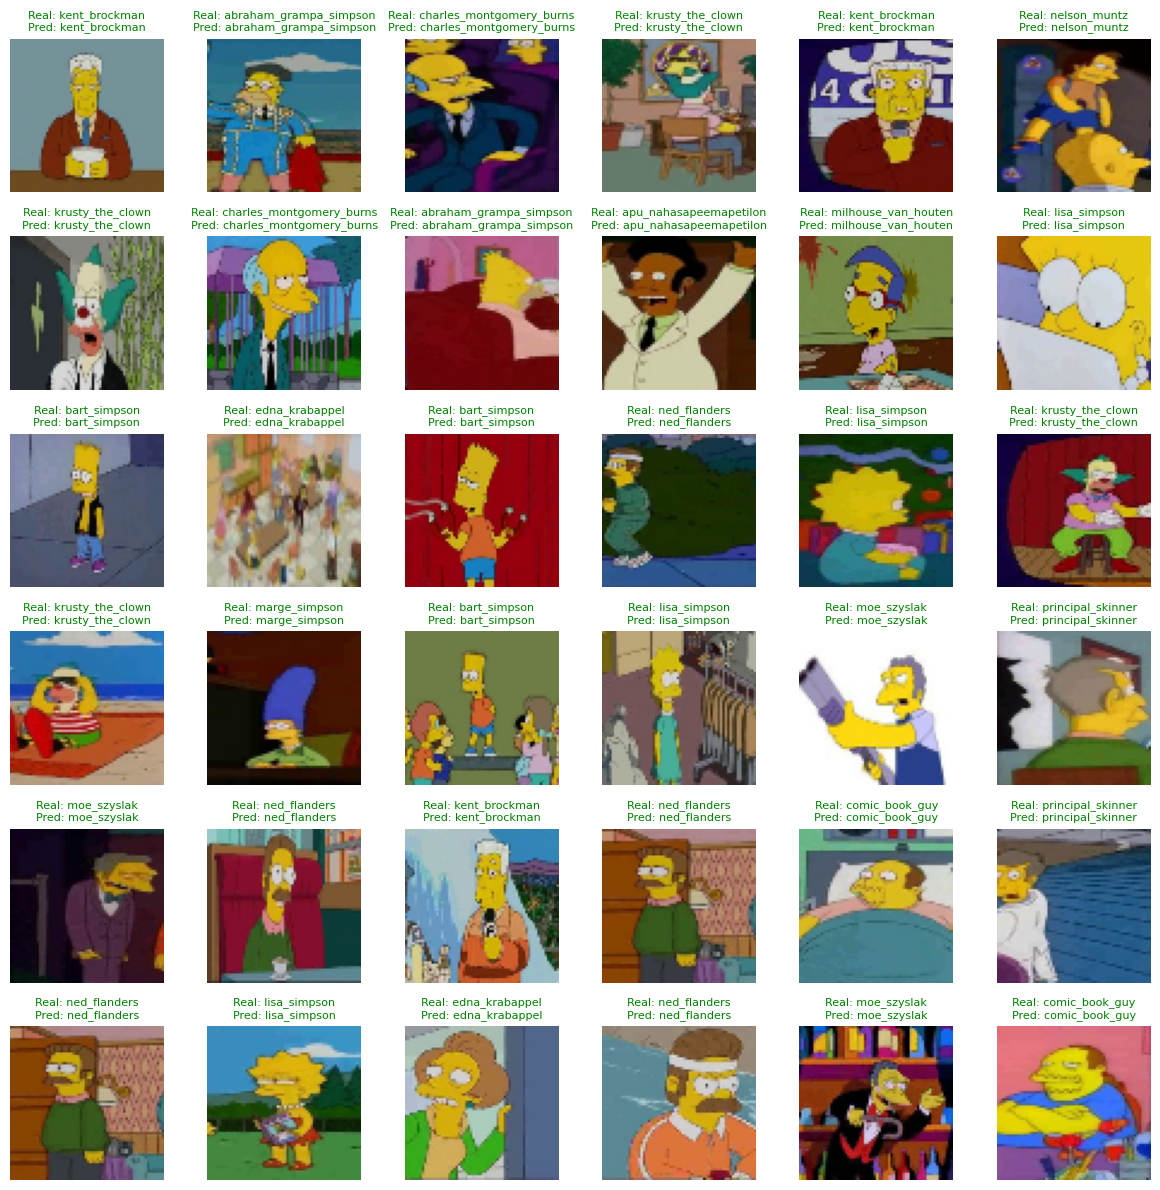

In [42]:
num_images = 36
cols = 6
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 2, rows * 2))  # Tamaño compacto

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype("uint8"), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    true_class_index = np.argmax(y_test[i])
    pred_class_index = np.argmax(cargarmodel.predict(X_test[i:i + 1])[0])

    true_label = MAP_CHARACTERS[true_class_index]
    pred_label = MAP_CHARACTERS[pred_class_index]
    color = "green" if true_class_index == pred_class_index else "red"

    # Etiquetas en líneas separadas
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color, fontsize=8)

plt.tight_layout()
plt.show()
